<a href="https://colab.research.google.com/github/denizbaris/Data-with-Python/blob/main/DAwPython7_fillna_outliers_crashedcolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np            #BU DERSTE NULL'LARI DOLDURUCAZ
import pandas as pd             
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

gender=["M","F","M","F","M","F","M","F","M","F","M"]
clas = ["a","b",np.nan,"a","b","c","a",np.nan,"c",np.nan,"b"]
V1 = np.array([2,3,5,np.NaN,7,1,np.NaN,10,14,np.nan,6])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3,7,9])
V3 = np.array([np.NaN,130,59,160,120,75,np.NaN,100,150,125,np.nan])
dept = ["HR","IT","IT","HR","IT",np.nan,"HR","IT",np.nan,"HR","IT"]
df = pd.DataFrame({
         "gender": gender,
          "class": clas,
          "var1" : V1,
          "var2" : V2,
         "salary": V3,
         "dept"  : dept   })
df


,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,NaN
6,M,a,NaN,NaN,NaN,HR
7,F,NaN,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,NaN,7.0,125.0,HR


In [3]:
df.isnull().sum()

gender    0
class     3
var1      3
var2      3
salary    3
dept      2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  11 non-null     object 
 1   class   8 non-null      object 
 2   var1    8 non-null      float64
 3   var2    8 non-null      float64
 4   salary  8 non-null      float64
 5   dept    9 non-null      object 
dtypes: float64(3), object(3)
memory usage: 656.0+ bytes


In [5]:
np.empty(3)

array([0.e+000, 5.e-324, 1.e-323])

In [6]:
df.dropna()          #nulllari drop et 

,gender,class,var1,var2,salary,dept
4,M,b,7.0,11.0,120.0,IT


In [7]:
df.isnull().sum() / len(df)    #herbir sutunda kac farkli null var 

gender    0.000000
class     0.272727
var1      0.272727
var2      0.272727
salary    0.272727
dept      0.181818
dtype: float64

In [8]:
df.salary.isnull().sum()   #sutun bazinda salaryde 3 tane bosluk var

3

In [9]:
df.isnull().any()  #herhangi null var mi

gender    False
class      True
var1       True
var2       True
salary     True
dept       True
dtype: bool

In [10]:
df.isnull().all()  #butun hepsi null olanlarin sorgusu

gender    False
class     False
var1      False
var2      False
salary    False
dept      False
dtype: bool

In [11]:
df.isnull().any(axis=1)

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8      True
9      True
10     True
dtype: bool

In [13]:
df[df.isnull().any(axis=1)]  #4. satir yok icinde null olmayanlari false olarak donderip true olanlari getirdi

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
5,F,c,1.0,NaN,75.0,NaN
6,M,a,NaN,NaN,NaN,HR
7,F,NaN,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,NaN,7.0,125.0,HR
10,M,b,6.0,9.0,NaN,IT


In [14]:
df[~(df.isnull().any(axis=1))]   #bir usttekinin tam tersi yapiyoruz sadece 4. satiri cikti veriyor ~ kullandik

,gender,class,var1,var2,salary,dept
4,M,b,7.0,11.0,120.0,IT


In [15]:
df.fillna("other")

,gender,class,var1,var2,salary,dept
0,M,a,2,8,other,HR
1,F,b,3,other,130,IT
2,M,other,5,5,59,IT
3,F,a,other,8,160,HR
4,M,b,7,11,120,IT
5,F,c,1,other,75,other
6,M,a,other,other,other,HR
7,F,other,10,2,100,IT
8,M,c,14,3,150,other
9,F,other,other,7,125,HR


In [17]:
df["salary"].fillna(df["salary"].mean())  #ortalama ile dolduruyor

0     114.875
1     130.000
2      59.000
3     160.000
4     120.000
5      75.000
6     114.875
7     100.000
8     150.000
9     125.000
10    114.875
Name: salary, dtype: float64

In [22]:
sal = df["salary"].median()     #ya da bununla da doldurabilir
df["salary"].fillna(sal)

0     122.5
1     130.0
2      59.0
3     160.0
4     120.0
5      75.0
6     122.5
7     100.0
8     150.0
9     125.0
10    122.5
Name: salary, dtype: float64

In [23]:
df[df.salary.isnull()] 

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
6,M,a,NaN,NaN,NaN,HR
10,M,b,6.0,9.0,NaN,IT


In [25]:
df.loc[ [0,6,10] , "salary"]   #her zaman 0 6 10 koyamam o yuzden kosulum salarysi null olanlari

0    NaN
6    NaN
10   NaN
Name: salary, dtype: float64

In [30]:
df.loc[ df.salary.isnull(),  "salary"] = df.salary.mean()   #loc ile satirlari filtreledik hangi stunuda yapicagimizi belirledik(salary) sonra mean ata
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,114.875,HR
1,F,b,3.0,NaN,130.000,IT
2,M,NaN,5.0,5.0,59.000,IT
3,F,a,NaN,8.0,160.000,HR
4,M,b,7.0,11.0,120.000,IT
5,F,c,1.0,NaN,75.000,NaN
6,M,a,NaN,NaN,114.875,HR
7,F,NaN,10.0,2.0,100.000,IT
8,M,c,14.0,3.0,150.000,NaN
9,F,NaN,NaN,7.0,125.000,HR


In [31]:
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,114.875,HR
1,F,b,3.0,NaN,130.000,IT
2,M,NaN,5.0,5.0,59.000,IT
3,F,a,NaN,8.0,160.000,HR
4,M,b,7.0,11.0,120.000,IT
5,F,c,1.0,NaN,75.000,NaN
6,M,a,NaN,NaN,114.875,HR
7,F,NaN,10.0,2.0,100.000,IT
8,M,c,14.0,3.0,150.000,NaN
9,F,NaN,NaN,7.0,125.000,HR


In [32]:
df.fillna({"class" : "other" ,      #burasi cooooooooooooook onemli sutunlari library ile doldur
           "var1" : df.var1.mean() , 
           "var2" : df.var2.median() , 
           "dept" : df.dept.mode()[0]})

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,114.875,HR
1,F,b,3.0,7.5,130.000,IT
2,M,other,5.0,5.0,59.000,IT
3,F,a,6.0,8.0,160.000,HR
4,M,b,7.0,11.0,120.000,IT
5,F,c,1.0,7.5,75.000,IT
6,M,a,6.0,7.5,114.875,HR
7,F,other,10.0,2.0,100.000,IT
8,M,c,14.0,3.0,150.000,IT
9,F,other,6.0,7.0,125.000,HR


In [33]:
df.notna()   #reverse isnull

,gender,class,var1,var2,salary,dept
0,True,True,True,True,True,True
1,True,True,True,False,True,True
2,True,False,True,True,True,True
3,True,True,False,True,True,True
4,True,True,True,True,True,True
5,True,True,True,False,True,False
6,True,True,False,False,True,True
7,True,False,True,True,True,True
8,True,True,True,True,True,False
9,True,False,False,True,True,True


In [34]:
df.where(df.notna(), df.median(), axis = 1)      #condition ve other istiyor where/ eger conditon false ise degisiklik yap

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,114.875,HR
1,F,b,3.0,7.5,130.000,IT
2,M,NaN,5.0,5.0,59.000,IT
3,F,a,5.5,8.0,160.000,HR
4,M,b,7.0,11.0,120.000,IT
5,F,c,1.0,7.5,75.000,NaN
6,M,a,5.5,7.5,114.875,HR
7,F,NaN,10.0,2.0,100.000,IT
8,M,c,14.0,3.0,150.000,NaN
9,F,NaN,5.5,7.0,125.000,HR


In [35]:
import warnings
warnings.filterwarnings("ignore")
df.where( df.notna(), df.median(), axis =1 )

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,114.875,HR
1,F,b,3.0,7.5,130.000,IT
2,M,NaN,5.0,5.0,59.000,IT
3,F,a,5.5,8.0,160.000,HR
4,M,b,7.0,11.0,120.000,IT
5,F,c,1.0,7.5,75.000,NaN
6,M,a,5.5,7.5,114.875,HR
7,F,NaN,10.0,2.0,100.000,IT
8,M,c,14.0,3.0,150.000,NaN
9,F,NaN,5.5,7.0,125.000,HR


In [37]:
df.dept.fillna((df.dept.mode()[0]), inplace=True)

In [38]:
df.loc[ [0,6,10] , "salary"] = np.nan
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,IT
6,M,a,NaN,NaN,NaN,HR
7,F,NaN,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,IT
9,F,NaN,NaN,7.0,125.0,HR


In [41]:
df.groupby(["dept"])["salary"].mean()  #dept e gore salaryinin ortalamasi ciktisi
#

dept
HR    142.500000
IT    105.666667
Name: salary, dtype: float64

In [45]:
df.salary.fillna(df.groupby(["dept"])["salary"].transform("mean"), inplace=True) #142.5 HR
#105.66 IT
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,142.500000,HR
1,F,b,3.0,NaN,130.000000,IT
2,M,NaN,5.0,5.0,59.000000,IT
3,F,a,NaN,8.0,160.000000,HR
4,M,b,7.0,11.0,120.000000,IT
5,F,c,1.0,NaN,75.000000,IT
6,M,a,NaN,NaN,142.500000,HR
7,F,NaN,10.0,2.0,100.000000,IT
8,M,c,14.0,3.0,150.000000,IT
9,F,NaN,NaN,7.0,125.000000,HR


In [47]:
df.groupby(["gender"])["var1"].mean()

gender
F    4.666667
M    6.800000
Name: var1, dtype: float64

In [49]:
df.var1.fillna(df.groupby(["gender"])["var1"].transform("mean"), inplace=True)  #transform yerine apply yapamiyoz apply ile yazarsak 2 deger aliyor ve lambda kullaniyoruz
df

,gender,class,var1,var2,salary,dept
0,M,a,2.000000,8.0,142.500000,HR
1,F,b,3.000000,NaN,130.000000,IT
2,M,NaN,5.000000,5.0,59.000000,IT
3,F,a,4.666667,8.0,160.000000,HR
4,M,b,7.000000,11.0,120.000000,IT
5,F,c,1.000000,NaN,75.000000,IT
6,M,a,6.800000,NaN,142.500000,HR
7,F,NaN,10.000000,2.0,100.000000,IT
8,M,c,14.000000,3.0,150.000000,IT
9,F,NaN,4.666667,7.0,125.000000,HR


##yeni data set

In [55]:
flights =sns.load_dataset("flights")  #burada basit bir time series var 
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


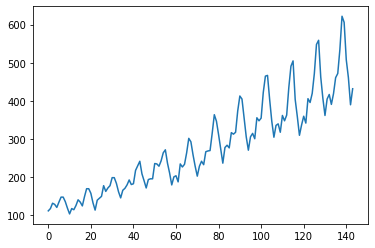

In [56]:
flights.passengers.plot()

In [58]:
np.random.seed(100)
flights.loc[np.random.randint(0,144,30),"passengers"] = np.nan  #rastgele 30 tane icinden secip icerisine nan atadik
flights

,year,month,passengers
0,1949,Jan,112.0
1,1949,Feb,118.0
2,1949,Mar,132.0
3,1949,Apr,129.0
4,1949,May,NaN
...,...,...,...
139,1960,Aug,606.0
140,1960,Sep,508.0
141,1960,Oct,NaN
142,1960,Nov,390.0


In [59]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

year           0
month          0
passengers    28
dtype: int64

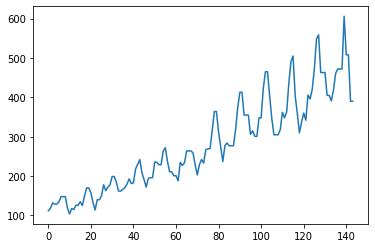

In [62]:
flights.passengers.fillna(method="ffill").plot()   #bfill alttaki deger ole dolduruyor, ffill bir ustteki deger ile dolduruyor

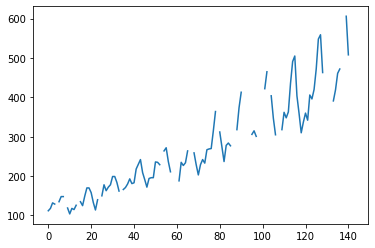

In [63]:
flights.passengers.plot()  #ustte doldurulmus sekli 

In [66]:
flights.passengers.interpolate()    #interpolate bos olan veriyi basina ve sonuna gore esit seklide dagitiyor

0      112.0
1      118.0
2      132.0
3      129.0
4      132.0
       ...  
139    606.0
140    508.0
141    449.0
142    390.0
143    390.0
Name: passengers, Length: 144, dtype: float64

In [67]:
np.linspace(129,135,3)

array([129., 132., 135.])

In [68]:
np.linspace(112,132,5)

array([112., 117., 122., 127., 132.])

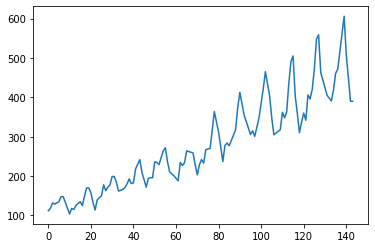

In [70]:
flights.passengers.interpolate().plot()

##OUTLIERS

In [5]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.3 MB


In [73]:
df.isnull().sum()

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [74]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


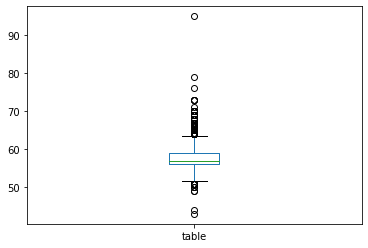

In [76]:
df.table.plot(kind= "box")

In [6]:
df_table = df.table
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [7]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [8]:
df_table.quantile(0.25)

56.0

In [ ]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1
IQR

In [13]:
lower_lim = Q1 - 1.5*IQR
lower_lim

51.5

In [14]:
upper_lim = Q3 + 1.5*IQR
upper_lim

63.5

In [15]:
(df_table < lower_lim).value_counts()

False    53924
True        16
Name: table, dtype: int64

In [16]:
not_outlier = (df_table >= lower_lim) & (df_table <= upper_lim)
not_outlier
#51.5 <= X <= 63.0

0         True
1         True
2        False
3         True
4         True
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Name: table, Length: 53940, dtype: bool

In [17]:
df_drop_outlier = df[not_outlier]
df_drop_outlier

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74
